In [2]:
# import library and load data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import session_info
%matplotlib inline

In [3]:
data = pd.read_csv("DMV_Written_Tests.csv")

In [4]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = data[["DMV_Test_1", "DMV_Test_2"]].values
results = data["Results"].values

[Text(0.5, 0, 'test1'), Text(0, 0.5, 'test2')]

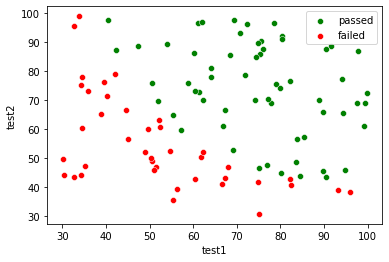

In [7]:
# visualize the data
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
scp = sns.scatterplot(x = scores[passed[:, 0], 0],
                      y = scores[passed[:, 0], 1],
                     markers = "^",
                      color = "green"
                     )
sns.scatterplot(x = scores[failed[:, 0], 0],
                      y = scores[failed[:, 0], 1],
                     markers = "*",
                      color = "red"
                     )

scp.legend(["passed","failed"])
scp.set(xlabel = "test1", ylabel = "test2")

In [8]:
# define the logistic sigmoid function
def logistic_sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# compute cost and gradient
def cost_gradient(x, y, theta):
    m = len(y)
    y_pred = logistic_sigmoid(np.dot(x, theta))
    cost = (- 1 / m) * (sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    gradient = (1 / m) * np.dot(x.transpose(),(y_pred - y))
    return cost, gradient

In [10]:
# initialize cost and gradient(theta = 0)
mean_scores = np.mean(scores, axis = 0)
std_scores = np.std(scores, axis = 0)
scores = (scores - mean_scores) / std_scores
#  scores row and column 
rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis = 1)
y = results.reshape(rows, 1)
theta_init = np.zeros((cols + 1, 1))

cost, gradient = cost_gradient(X, y, theta_init)
print("initial cost :", cost, "initial gradient",gradient)

initial cost : [0.69314718] initial gradient [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [11]:
# gradient descent
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = cost_gradient(x, y, theta)
        costs.append(cost)
        theta -= alpha * gradient
        
    return costs, theta
    
        

In [12]:
costs, theta = gradient_descent(X, y, theta_init, 1, 200)

In [13]:
print("theta after gradient descent : ", theta, "cost with current theta : ", costs[-1])

theta after gradient descent :  [[1.50850586]
 [3.5468762 ]
 [3.29383709]] cost with current theta :  [0.20489382]


Text(0, 0.5, '$J(\\Theta)$')

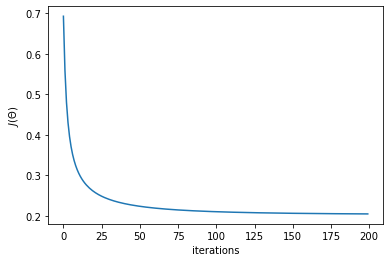

In [14]:
# plot the convergence of J(theta)
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")

<AxesSubplot:xlabel='test1', ylabel='test2'>

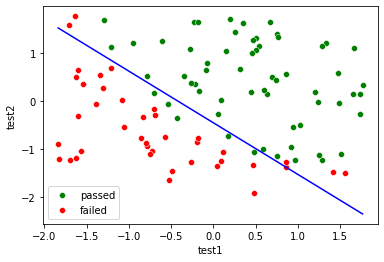

In [15]:
# plot the decision boundary
new_scp = sns.scatterplot(x = X[passed[:,0],1],
                         y = X[passed[:,0], 2],
                         markers = "^",
                         color = "green")
sns.scatterplot(x = X[failed[:, 0], 1],
               y = X[failed[:,0],2],
                markers = "*",
                color = "red"
               )

new_scp.legend(["passed", "failed"])
new_scp.set(xlabel = "test1", ylabel = "test2")
X_boundary = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_boundary = -(theta[0] + theta[1] * X_boundary) / theta[2]
sns.lineplot(x = X_boundary, y = y_boundary, color = "blue")

In [16]:
# prediction using the optimized theta 
def predict(theta, x):
    result = logistic_sigmoid(np.dot(x, theta))
    return result > 0.5

In [17]:
# calculate accuracy with training data
p = predict(theta, X)
accuracy = sum(p == y)
print("accuracy is :", accuracy[0],"%")

accuracy is : 89 %


In [18]:
# predict for the test data
test = np.array([50, 79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test, axis = 0)
p_test = logistic_sigmoid(np.dot(test, theta))
print("the probability of passing the test is " ,np.round(p_test[0],2))

the probability of passing the test is  0.71


In [19]:
pip install session-info

Note: you may need to restart the kernel to use updated packages.


In [20]:
session_info.show()